In [4]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126


In [5]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [6]:
!cd yolov5 & pip install -r requirements.txt 

In [7]:
import torch #derin öğrenme kütp
from matplotlib import pyplot as plt #grafik yapma kütp
import numpy as np #sayısal işlemler yapma kütp
import cv2 #görüntü işleme , kamera açma , nesne tespiti

In [8]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True' #işlemcinin çökmesini önler, işlemce birden fazla kütüphane çalışıyorsa 

In [9]:
model= torch.hub.load('ultralytics/yolov5','yolov5s') #yolo5v modelini pytorch ortamına indirir

Using cache found in C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-3-3 Python-3.12.4 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [10]:
img= 'https://static01.nyt.com/athletic/uploads/wp/2022/04/11093015/GettyImages-650877468.jpg'

In [11]:
result = model(img)
result.print()

C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1287x1795 10 persons, 3 ties
Speed: 996.9ms pre-process, 93.4ms inference, 239.8ms NMS per image at shape (1, 3, 480, 640)


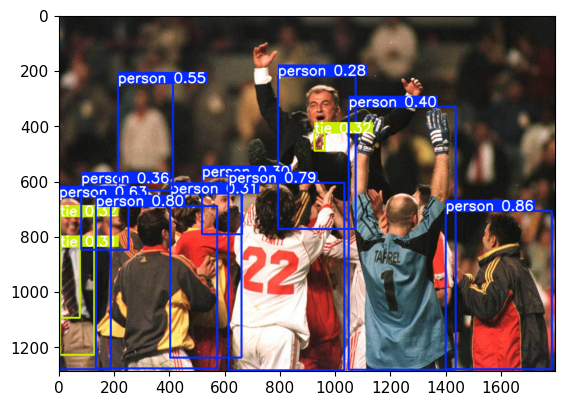

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()
#render ettik burda imgyi

REAL TİME / CAANLI KAAMERA


In [20]:
cam= cv2.VideoCapture(0) #opencv içinde video yakalamk için kamerayı açar 0 pcnin kendi kamerasıdır
while cam.isOpened(): #burda kamera açıkmı diye kontrol ediliyor cam nesnesi ile
    ret,frame = cam.read() #ret -true yada false döner- false dönerse kamera kapalı demektir, frame camden gelen veri tutar

    #Tespit yapmak için
    result= model(frame)

    cv2.imshow('YORGUNLUK TESPIT', np.squeeze(result.render()))#opencv kullanrak pencere açar ve kamerayı gösterir-squeeze gereksiz görüntüleri siler

    if cv2.waitKey(10) & 0xFF == ord('q'):#wait key ile 10ms klavyeden hareket beklenir ve q basılırsa işlmei bitirir
        break
cam.release()#kamerayı kapatır
cv2.destroyAllWindows()#açık olan opencv pencerelerini kapatır

C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\comm

MODELİ EĞİTME KISMI

In [17]:
import uuid
import time

In [18]:
IMAGES_PATH = os.path.join('data','images')
labels = ['uyanık','yorgun']
number_imgs=20

In [26]:
cap = cv2.VideoCapture(0)
#etiketler arasında döngü
for label in labels:
    print('Goruntuleri toplamak icin {}'.format(label))
    time.sleep(5)


    #resimler arasında döngü
    for img_num in range(number_imgs):
        print('Goruntuleri toplamak icin {} , resim sayısı {}'.format(label,img_num))

        #webcam açma
        ret , frame =cap.read()

        #dosyayı adlandırma 
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        #resmi dosyaya yazma
        cv2.imwrite(imgname, frame)
        #ekranı render eder 
        cv2.imshow('Resim Koleksiyonu',frame)
        #2 saniye delay captures arasında
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):#wait key ile 10ms klavyeden hareket beklenir ve q basılırsa işlmei bitirir
            break
cap.release()#kamerayı kapatır
cv2.destroyAllWindows()#açık olan opencv pencerelerini kapatır



Goruntuleri toplamak icin uyanık
Goruntuleri toplamak icin uyanık , resim sayısı 0
Goruntuleri toplamak icin uyanık , resim sayısı 1
Goruntuleri toplamak icin uyanık , resim sayısı 2
Goruntuleri toplamak icin uyanık , resim sayısı 3
Goruntuleri toplamak icin uyanık , resim sayısı 4
Goruntuleri toplamak icin uyanık , resim sayısı 5
Goruntuleri toplamak icin uyanık , resim sayısı 6
Goruntuleri toplamak icin uyanık , resim sayısı 7
Goruntuleri toplamak icin uyanık , resim sayısı 8
Goruntuleri toplamak icin uyanık , resim sayısı 9
Goruntuleri toplamak icin uyanık , resim sayısı 10
Goruntuleri toplamak icin uyanık , resim sayısı 11
Goruntuleri toplamak icin uyanık , resim sayısı 12
Goruntuleri toplamak icin uyanık , resim sayısı 13
Goruntuleri toplamak icin uyanık , resim sayısı 14
Goruntuleri toplamak icin uyanık , resim sayısı 15
Goruntuleri toplamak icin uyanık , resim sayısı 16
Goruntuleri toplamak icin uyanık , resim sayısı 17
Goruntuleri toplamak icin uyanık , resim sayısı 18
Goruntul

In [20]:
for label in labels:
    print('Goruntuleri toplamak icin {}'.format(label))
    for img_num in range(number_imgs):
        print('Goruntuleri toplamak icin {} , resim sayısı {}'.format(label,img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)


Goruntuleri toplamak icin uyanık
Goruntuleri toplamak icin uyanık , resim sayısı 0
data\images\uyanık.20917c3d-2b78-11f0-99f2-505a657d1750.jpg
Goruntuleri toplamak icin uyanık , resim sayısı 1
data\images\uyanık.20917c3e-2b78-11f0-9e0f-505a657d1750.jpg
Goruntuleri toplamak icin uyanık , resim sayısı 2
data\images\uyanık.20917c3f-2b78-11f0-83db-505a657d1750.jpg
Goruntuleri toplamak icin uyanık , resim sayısı 3
data\images\uyanık.20917c40-2b78-11f0-b42e-505a657d1750.jpg
Goruntuleri toplamak icin uyanık , resim sayısı 4
data\images\uyanık.20917c41-2b78-11f0-a222-505a657d1750.jpg
Goruntuleri toplamak icin uyanık , resim sayısı 5
data\images\uyanık.20917c42-2b78-11f0-b01c-505a657d1750.jpg
Goruntuleri toplamak icin uyanık , resim sayısı 6
data\images\uyanık.20917c43-2b78-11f0-a9c0-505a657d1750.jpg
Goruntuleri toplamak icin uyanık , resim sayısı 7
data\images\uyanık.20917c44-2b78-11f0-a363-505a657d1750.jpg
Goruntuleri toplamak icin uyanık , resim sayısı 8
data\images\uyanık.20917c45-2b78-11f0

In [21]:
!git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [22]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [33]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 20 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-398-g5cdad892 Python-3.12.4 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_ep

YORGUNLUK MODELİ YÜKLEME KISMI

In [35]:
model = torch.hub.load('ultralytics/yolov5','custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\User/.cache\torch\hub\master.zip
YOLOv5  2025-5-11 Python-3.12.4 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [38]:
resim = os.path.join('data','images','uyanık.8d5c5fe7-2b7c-11f0-8a44-505a657d1750.jpg')

In [42]:
results = model(resim)

C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [46]:
results.print()

image 1/1: 480x640 1 uyanik
Speed: 9.4ms pre-process, 28.0ms inference, 49.4ms NMS per image at shape (1, 3, 480, 640)


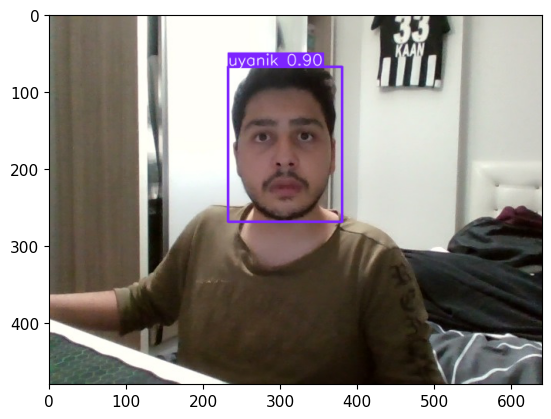

In [48]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [50]:
cam= cv2.VideoCapture(0) #opencv içinde video yakalamk için kamerayı açar 0 pcnin kendi kamerasıdır
while cam.isOpened(): #burda kamera açıkmı diye kontrol ediliyor cam nesnesi ile
    ret,frame = cam.read() #ret -true yada false döner- false dönerse kamera kapalı demektir, frame camden gelen veri tutar

    #Tespit yapmak için
    result= model(frame)

    cv2.imshow('YORGUNLUK TESPIT', np.squeeze(result.render()))#opencv kullanrak pencere açar ve kamerayı gösterir-squeeze gereksiz görüntüleri siler

    if cv2.waitKey(10) & 0xFF == ord('q'):#wait key ile 10ms klavyeden hareket beklenir ve q basılırsa işlmei bitirir
        break
cam.release()#kamerayı kapatır
cv2.destroyAllWindows()#açık olan opencv pencerelerini kapatır

C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\comm

In [52]:
import winsound  
import time

cam = cv2.VideoCapture(0)
uykulu_start_time = None
uykulu_alerted = False

while cam.isOpened():
    ret, frame = cam.read()
    if not ret:
        break

    results = model(frame)
    labels = results.names
    preds = results.pred[0]
    detected_classes = [labels[int(cls)] for *xyxy, conf, cls in preds]

    # 5sn uykulu algılanırsa alarm çal
    if 'uykulu' in detected_classes:
        if uykulu_start_time is None:
            uykulu_start_time = time.time()
        elif time.time() - uykulu_start_time >= 5 and not uykulu_alerted:
            print(" 5 saniyedir uykulu durumda")
            winsound.Beep(1000, 1000)  # 1 saniyelik uyarı sesi
            uykulu_alerted = True
    else:
        uykulu_start_time = None
        uykulu_alerted = False

    cv2.imshow("YORGUNLUK TESPIT", np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord("q"):
        break

cam.release()
cv2.destroyAllWindows()

C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\comm

🚨 5 saniyedir uykulu durumda!


C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\comm